# Electronics Store Sales Analysis

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

### Step 1 : Merging 12 months of sales data into a single file

In [19]:
#df = pd.read_csv('./Sales_Data/Sales_April_2019.csv')
# file location -- ./Sales_Data

files = [file for file in os.listdir('./Sales_Data')]

#Create an empty DataFrame
all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv('./Sales_Data/' + file)
    all_months_data = pd.concat([all_months_data, df])

#Save all_months_data
all_months_data.to_csv('./Sales_Data/all_data.csv', index=False)

#### read in updated dataframe

In [97]:
all_data = pd.read_csv('./Sales_Data/all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


### Step 2 : Clean the Data

#### drop row of NaN month

In [98]:
nan_df = all_data[all_data.isna().any(axis=1)]
all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


#### find 'Or' and delete

In [99]:
all_data = all_data[all_data['Order Date'].str[0:2]!='Or']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


### Step 3 : Creat month column

In [100]:
all_data['Month']=all_data['Order Date'].str[:2]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


In [101]:
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


#### convert datatype

In [104]:
all_data['Quantity Ordered'].dtype

dtype('int32')

In [105]:
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

In [106]:
all_data['Price Each'].dtype

dtype('float64')

### Step 4 : Add a sales column

In [107]:
all_data['Sales'] = all_data['Quantity Ordered']*all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


### Question 1: What's the best month for sales? How much was earned that month?

In [126]:
results = all_data.groupby('Month').sum()
# December is the best month for sales
results

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


Text(0, 0.5, 'Sales in USD ($)')

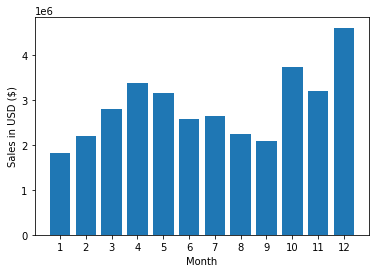

In [132]:
months = range(1,13)
plt.bar(months,results['Sales'])
plt.xticks(months)
plt.xlabel('Month')
plt.ylabel('Sales in USD ($)')

### Question 2: Which city had the highest number of sales

#### Add a city column

In [181]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x) })")

#all_data['City'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1])
#all_data.drop(columns=r'(Street Name, City, State, Zip Code)')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,"(Street Name, City, State, Zip Code)",City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,"[136 Church St, New York City, NY 10001]",New York City (NY)
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,"[562 2nd St, New York City, NY 10001]",New York City (NY)
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,"[277 Main St, New York City, NY 10001]",New York City (NY)
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,"[410 6th St, San Francisco, CA 94016]",San Francisco (CA)
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,"[43 Hill St, Atlanta, GA 30301]",Atlanta (GA)


In [223]:
results =all_data.groupby('City').sum()
results

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06
Austin (TX),11153,1.809874e+06,69829,1.819582e+06
Boston (MA),22528,3.637410e+06,141112,3.661642e+06
Dallas (TX),16730,2.752628e+06,104620,2.767975e+06
Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06
New York City (NY),27932,4.635371e+06,175741,4.664317e+06
Portland (ME),2750,4.471893e+05,17144,4.497583e+05
Portland (OR),11303,1.860558e+06,70621,1.870732e+06
San Francisco (CA),50239,8.211462e+06,315520,8.262204e+06


Text(0, 0.5, 'Sales in USD ($)')

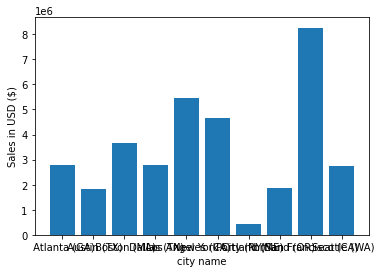

In [226]:
cities=[city for city, df in all_data.groupby('City')]

plt.bar(cities, results['Sales'])
plt.xlabel('city name')
plt.ylabel('Sales in USD ($)')

### Question 3 : What time should we display advertisement to maximize likelihood of customer's buying  producst?

In [245]:
all_data['Purchase Time']=all_data['Order Date'].str[-5:-3].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,"(Street Name, City, State, Zip Code)",City,Purchase Time
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,"[136 Church St, New York City, NY 10001]",New York City (NY),0
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,"[562 2nd St, New York City, NY 10001]",New York City (NY),7
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,"[277 Main St, New York City, NY 10001]",New York City (NY),18
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,"[410 6th St, San Francisco, CA 94016]",San Francisco (CA),15
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,"[43 Hill St, Atlanta, GA 30301]",Atlanta (GA),12


In [246]:
results3 = all_data.groupby('Purchase Time').count()

In [248]:
all_data['Order Date Timestamp'] = pd.to_datetime(all_data['Order Date'])

In [250]:
all_data['Time of the Day'] = all_data['Order Date Timestamp'].dt.hour
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,"(Street Name, City, State, Zip Code)",City,Purchase Time,Order Date Timestamp,Time of the Day
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,"[136 Church St, New York City, NY 10001]",New York City (NY),0,2019-12-30 00:01:00,0
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,"[562 2nd St, New York City, NY 10001]",New York City (NY),7,2019-12-29 07:03:00,7
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,"[277 Main St, New York City, NY 10001]",New York City (NY),18,2019-12-12 18:21:00,18
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,"[410 6th St, San Francisco, CA 94016]",San Francisco (CA),15,2019-12-22 15:13:00,15
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,"[43 Hill St, Atlanta, GA 30301]",Atlanta (GA),12,2019-12-18 12:38:00,12


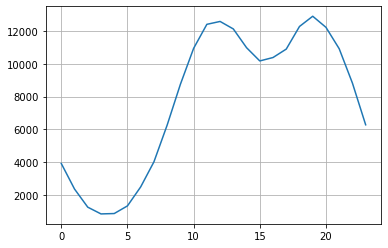

In [262]:
hours = [hour for hour, df in all_data.groupby('Time of the Day')]
plt.plot(hours, all_data.groupby('Time of the Day').count()['Order ID'])
plt.grid()

### Question 4: What products are most often sold together?

In [283]:
# filter out the duplicated rows
df = all_data[all_data['Order ID'].duplicated(keep=False)]
df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,"(Street Name, City, State, Zip Code)",City,Purchase Time,Order Date Timestamp,Time of the Day
16,295681,Google Phone,1,600.00,12/25/19 12:37,"79 Elm St, Boston, MA 02215",12,600.00,"[79 Elm St, Boston, MA 02215]",Boston (MA),12,2019-12-25 12:37:00,12
17,295681,USB-C Charging Cable,1,11.95,12/25/19 12:37,"79 Elm St, Boston, MA 02215",12,11.95,"[79 Elm St, Boston, MA 02215]",Boston (MA),12,2019-12-25 12:37:00,12
18,295681,Bose SoundSport Headphones,1,99.99,12/25/19 12:37,"79 Elm St, Boston, MA 02215",12,99.99,"[79 Elm St, Boston, MA 02215]",Boston (MA),12,2019-12-25 12:37:00,12
19,295681,Wired Headphones,1,11.99,12/25/19 12:37,"79 Elm St, Boston, MA 02215",12,11.99,"[79 Elm St, Boston, MA 02215]",Boston (MA),12,2019-12-25 12:37:00,12
36,295698,Vareebadd Phone,1,400.00,12/13/19 14:32,"175 1st St, New York City, NY 10001",12,400.00,"[175 1st St, New York City, NY 10001]",New York City (NY),14,2019-12-13 14:32:00,14
37,295698,USB-C Charging Cable,2,11.95,12/13/19 14:32,"175 1st St, New York City, NY 10001",12,23.90,"[175 1st St, New York City, NY 10001]",New York City (NY),14,2019-12-13 14:32:00,14
42,295703,AA Batteries (4-pack),1,3.84,12/17/19 12:27,"502 Jefferson St, Austin, TX 73301",12,3.84,"[502 Jefferson St, Austin, TX 73301]",Austin (TX),12,2019-12-17 12:27:00,12
43,295703,Bose SoundSport Headphones,1,99.99,12/17/19 12:27,"502 Jefferson St, Austin, TX 73301",12,99.99,"[502 Jefferson St, Austin, TX 73301]",Austin (TX),12,2019-12-17 12:27:00,12
66,295726,iPhone,1,700.00,12/25/19 14:49,"203 Lakeview St, Boston, MA 02215",12,700.00,"[203 Lakeview St, Boston, MA 02215]",Boston (MA),14,2019-12-25 14:49:00,14
67,295726,Lightning Charging Cable,1,14.95,12/25/19 14:49,"203 Lakeview St, Boston, MA 02215",12,14.95,"[203 Lakeview St, Boston, MA 02215]",Boston (MA),14,2019-12-25 14:49:00,14


In [284]:
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df.head()

<ipython-input-284-fe9ddc098ab3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,"(Street Name, City, State, Zip Code)",City,Purchase Time,Order Date Timestamp,Time of the Day,Grouped
16,295681,Google Phone,1,600.00,12/25/19 12:37,"79 Elm St, Boston, MA 02215",12,600.00,"[79 Elm St, Boston, MA 02215]",Boston (MA),12,2019-12-25 12:37:00,12,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
17,295681,USB-C Charging Cable,1,11.95,12/25/19 12:37,"79 Elm St, Boston, MA 02215",12,11.95,"[79 Elm St, Boston, MA 02215]",Boston (MA),12,2019-12-25 12:37:00,12,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
18,295681,Bose SoundSport Headphones,1,99.99,12/25/19 12:37,"79 Elm St, Boston, MA 02215",12,99.99,"[79 Elm St, Boston, MA 02215]",Boston (MA),12,2019-12-25 12:37:00,12,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
19,295681,Wired Headphones,1,11.99,12/25/19 12:37,"79 Elm St, Boston, MA 02215",12,11.99,"[79 Elm St, Boston, MA 02215]",Boston (MA),12,2019-12-25 12:37:00,12,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,Vareebadd Phone,1,400.00,12/13/19 14:32,"175 1st St, New York City, NY 10001",12,400.00,"[175 1st St, New York City, NY 10001]",New York City (NY),14,2019-12-13 14:32:00,14,"Vareebadd Phone,USB-C Charging Cable"


In [287]:
#drop duplicated rows
df1 = df[['Order ID', 'Grouped']].drop_duplicates()
df1.head()

,Order ID,Grouped
16,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,"Vareebadd Phone,USB-C Charging Cable"
42,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,"iPhone,Lightning Charging Cable"
76,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"


In [296]:
# find the most common combination
from itertools import combinations
from collections import Counter

count = Counter()

for row in df1['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))

for key, value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### Question 5: What's product sold the most? Why do you think it's sold the most?

<BarContainer object of 19 artists>

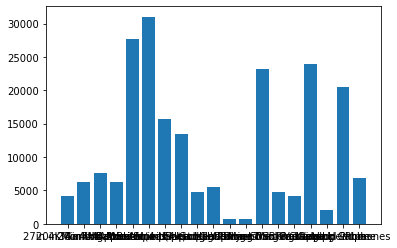

In [303]:
all_data.head()
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product, pd in product_group]

plt.bar(products, quantity_ordered)

<ipython-input-312-d31bbf207e4b>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)


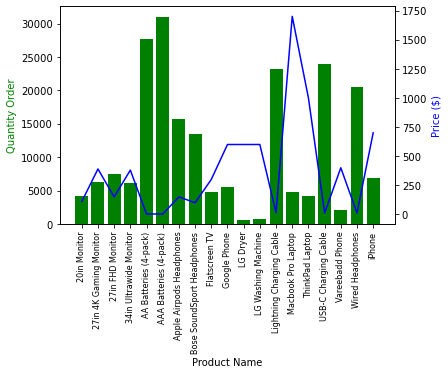

In [312]:
prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered,color='g')
ax2.plot(products, prices, '-b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Order', color='g')
ax2.set_ylabel('Price ($)', color='b')

ax1.set_xticklabels(products, rotation='vertical', size=8)

plt.show()
